<img src='https://thumbs.dreamstime.com/z/web-136162863.jpg' width="500" align = 'center'>

# <font color='lightblue'>EDA + Making Predictions + Answering Questions (Total Points 22)</font>

In this project you will perform an exploritory data analysis (EDA) using visualizations and correlations. You may choose from one of the datasets within the [class shared data folder](https://drive.google.com/drive/folders/1s2Civxvys_SR1sFF7D2ept1GSmFbICQb?usp=sharing), or search for a dataset that interests you the most! [Kaggle](https://www.kaggle.com/datasets?fileType=csv) is a good place to start, as they often have relatively clean and easy to use datasets, but feel free to explore other places. There is a lot of data out there! 

And in this project you will build a model to make predictions. This project will build on your exploritory data analyitic (EDA) skills. You may choose to use the datasets you used with project 1 or move to another dataset. 

In this project you will use all you learnt about in the class to answer a question. Imagine you are part of a team and you have been assigned a question to answer, build a notebook that you would be able to share with your team that shows what you found. 


In this project you will:
1.  Introduce your question of interest
1.  Choose and download a dataset Develop an understanding of the dataset
2.  Make sure your reader knows enough about the data
2.  Get summary statistics for key variables

2. b) Do exploritory data analysis and visualzation
3.  Create visuals to help understand your data
4.  Use correlation to measure relationships between key variables
5.  Summarise how EDA helped (or not!) in understanding your dataset
6.  Do some data preprocessing
3.  Wrangle and preprocess your data so that a team mate can reproduce your work
4.  Build and test a model that can provide insight into your question
7.  Build a predictive model 
8.  Measure the performance of your model
5.  Interpret your model results
9.  Summarize and interpret your results
6.  Answer your question


<font color='green'> Note: Marks will be awarded for clarity, organization, and succinctness. I.e., try to point out only the important parts in a well-organized easy to follow manner. (Marks: 3)

## <font color='lightblue'>1. Ask a question </font>

<font color='orange'> **Q1**: Layout your question of interest. Remember to state your question as clearly and simply as you can (Mark 1), and what your ideal outcome would be (Marks 1).</font>

**Primary Biliary Cholangitis (PBC)  is a chronic disease in which the bile ducts in your liver are slowly destroyed. It is a auto-immune disease that primary affects women and early detection is key\.**
<img src=https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2013/11/15/17/40/ds00604_-ds00918_im02271_r7_biliarysystemthu_jpg.jpg  width="100" align ='right'> 
**My dataset is from PBC patients, I would idealy like to find a model that can help to find a patient in the earliest stages of the liver of the PBC patient.
The next step would be to have a dataset with healthy patients and unhealthy patients and apply my model so that we can have a complete model to find a stage 1, stage 2 and 3, or stage 4 of a PBC patient .**

**Can my model correctly [classify/predict] an early stage PBC patient?**

**An  ideal outcome would be a better prediction accurracy then my base rate of.
My base rate of stage 1 only before pre-processing is (21(stage 1)  / 418(Tot_stages ) = 5% .  
Base Rate for stage 2 & 3 combined is 60%**

**A solution higher than my different   base rates of  different stages would be idealized.
if I predicted all the stage of the patient to be of  stage 1 , I would have 5% chances to be correct . I would also like to focus on my sensitvity score rather then my specificity as I would like to correctly identified my stages.**



<font color='orange'>**Q2**: Identify and describe what data sources you'll use (Marks 1). Make sure to talk about one of the following: data accuracy, reliability, validity, or sample selection. (Marks: 1)</font>

**This dataset is called  Cirrhosis Prediction Dataset in Kaggle : https://www.kaggle.com/fedesoriano/cirrhosis-prediction-dataset .
The information is collected from the Mayo Clinic trial in Primary Biliary Cirrhosis (PBC) of the liver conducted between 1974 and 1984. 
424 PBC patients receiveced  a randomized placebo-controlled trial of the drug D-penicillamine.** 

**Data Accuraccy, reliability, validity: The first 312 case entries were accurate but the additional 106 patient were not accurately added to my dataset with a substantial NA columns for Ascites, Hepatomegaly Edema, Alk_Phos, SGOT, Tryglicerides and Copper.
This Dataset was originnaly taken from a Math Book in a appendix 
</br> references : http://www.math.ucsd.edu/~rxu/math284/CaseStudy.pdf <br>
citation:
fedesoriano. (August 2021). Cirrhosis Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/cirrhosis-prediction-dataset.**

<font color='orange'>**Q3**: Layout what kind of ML problem you are facing and what kind of model you'll use to answer it (eg., is it unsupervised or supervised learning, and is it classification or regression). Make sure to say why. (Marks 1)
</font>

**Classification is the process of finding a model that describes and distinguishes data classes. I want to classify if my patients are of stage 1 or not. Although, I could use unsupervised learning to cluster patients of Stage 1, our Dataset is well labeled so we can produce a data output from the previous experience by using a supervised ML Algorithm.**

**Regression models continuous-values functions most often used for a numeric prediction. If the goal was to generate a spectrum of the stage from  [0,4] we can use regression analysis.**

**The Random forest builds  an ensemble of decision trees, it can be trained with the “bagging” method. A combination of learning models increases the overall result.
Random forest is a supervised learning algorithm and is very versatile.
It can be used for both regression and classification tasks.
It has a really good accuraccy despite its rather difficult explainability.**

**As a second model I chose logistic regression as a classification algorithm , which can be applied to my question,  it  measures the relationship between a categorical dependent variable and one or more independent variables.**

In [ ]:
#@title Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Action:** Import python libraries


In [ ]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
import statsmodels.formula.api as smf
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# <font color='lightblue'>1. a) Data Understanding </font>

## <font color='red'> **Action**: While above you gave an overview of the dataset(s) that will be used, here make sure that the reader understands the important details of the data. E.g., show a figure or descriptive statistic and explain why the reader should know about this, i.e., how will it help your reader understand your analysis? (Marks: 2)

In [ ]:
#Function that convert days in years
def converge_days_in_years(x):
  return int(x / 365)

**Action:** Import your data into colaboratory.


In [ ]:
# The ID of the Patient is irrelevant, so I dropped it and converted days and years 
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet/Cirrhosis/cirrhosis.csv')
df = df.drop(['ID'], axis=1)
df.Age= df.Age.apply(converge_days_in_years) 


# shift column 'Age' to 7th position
second_column = df.pop('Age')
# insert column using insert(position,column_name,column) function
df.insert(8, 'Age', second_column)

# shift column 'N_Days' to 8th position
first_column = df.pop('N_Days')
# insert column using insert(position,column_name,column) function
df.insert(8, 'N_Days', first_column)

df_St1 = df.copy() 
df.head(3)

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Age,N_Days,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,D,D-penicillamine,F,Y,Y,Y,Y,58,400,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,C,D-penicillamine,F,N,Y,Y,N,56,4500,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,D,D-penicillamine,M,N,N,N,S,70,1012,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0


In [ ]:
print("The Dataframe has ",df_St1.shape[0]," rows and", df_St1.shape[1]," columns")

The Dataframe has  418  rows and 19  columns


In [ ]:
#Calculate the current Base Rate
Base_Rate1 = len(df_St1.Stage[df_St1.Stage == 1]  )/len(df_St1.Stage)
Base_Rate2 = len(df_St1.Stage[df_St1.Stage == 2] + df_St1.Stage[df_St1.Stage == 3] )/len(df_St1.Stage)
print("Base Rate for Stage1=",Base_Rate1,", Base Rate for Stage 2 & 3 combined is=",Base_Rate2 )



Base Rate for Stage1= 0.050239234449760764 , Base Rate for Stage 2 & 3 combined is= 0.5909090909090909


**Action:** Determine the types of data are you dealing with & handle missing data (if there is any!). *get the data in and show the datatypes*

In [ ]:
print("\nN_Days, Age, Bilirubin,Cholesterol,Albumin,Copper, Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin are quantitative/numerical continuous attribute, they are 64 bit floats.\n")
print("Sex, Ascites,Hepatomegaly,Spiders,Edema are qualitative/nominal asymmetric binary variables represented as objects. My target variable Stage is numerical ordinal attribute.  \n\n")
print("Summary of my variables:\n",df.dtypes)


N_Days, Age, Bilirubin,Cholesterol,Albumin,Copper, Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin are quantitative/numerical continuous attribute, they are 64 bit floats.

Sex, Ascites,Hepatomegaly,Spiders,Edema are qualitative/nominal asymmetric binary variables represented as objects. My target variable Stage is numerical ordinal attribute.  


Summary of my variables:
 Status            object
Drug              object
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Age                int64
N_Days             int64
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object


In [ ]:
print("An additional 112 cases did not participate in the clinical trial of the drug D-penicillamine but they consented to have basic measurements recorded which can explain the missing data. ")
df_St1.isnull().sum() / len(df)

An additional 112 cases did not participate in the clinical trial of the drug D-penicillamine but they consented to have basic measurements recorded which can explain the missing data. 


Status           0.000000
Drug             0.253589
Sex              0.000000
Ascites          0.253589
Hepatomegaly     0.253589
Spiders          0.253589
Edema            0.000000
Age              0.000000
N_Days           0.000000
Bilirubin        0.000000
Cholesterol      0.320574
Albumin          0.000000
Copper           0.258373
Alk_Phos         0.253589
SGOT             0.253589
Tryglicerides    0.325359
Platelets        0.026316
Prothrombin      0.004785
Stage            0.014354
dtype: float64

In [ ]:
#drop rows of columns that contains missing values
df = df[df.Tryglicerides.isna()==False]  #drop rows of Tryglicerides that contains missing values in dataframe df
df = df[df.Platelets.isna()==False] #drop rows of Platelets that contains missing values in dataframe df
df = df[df.Copper.isna()==False] #drop rows of Copper that contains missing values in dataframe df
df.isna().sum() #sum the numbers of missing values 

Status           0
Drug             0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Age              0
N_Days           0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

**The Summary indicates that our dataset is clean**

# <font color='lightblue'>1. b) Summary statistics </font>

From the general description, we can see our younguest individual was 26 years and oldest was 78 years old, the average age is 49 years old.
For numeric variables such as :N_Days,	Age,	Bilirubin,	Cholesterol,	Albumin,Copper, Alk_Phos,	SGOT,	Tryglicerides,	Platelets,	Prothrombin	.
we can describe their distribution. We can compute their mean value, median and measures of central tendency.

In [ ]:
#From the Stage median we can say at least 50% of the values of stages are less then Stage 3
df.describe()

,Age,N_Days,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,49.322464,1979.166667,3.333696,371.260870,3.516812,100.768116,1996.611594,124.119239,124.978261,261.771739,10.735507,3.039855
std,10.523791,1112.380295,4.601074,234.788363,0.404789,88.268746,2115.477894,56.719952,65.280761,93.128857,1.008315,0.853999
min,26.000000,41.000000,0.300000,120.000000,1.960000,4.000000,289.000000,28.380000,33.000000,62.000000,9.000000,1.000000
25%,41.000000,1185.750000,0.800000,249.500000,3.310000,42.750000,922.500000,82.457500,85.000000,200.000000,10.000000,2.000000
50%,49.000000,1788.000000,1.400000,310.000000,3.545000,74.000000,1277.500000,116.625000,108.000000,257.000000,10.600000,3.000000
75%,56.000000,2689.750000,3.525000,401.000000,3.772500,129.250000,2068.250000,153.450000,151.250000,318.250000,11.200000,4.000000
max,78.000000,4556.000000,28.000000,1775.000000,4.400000,588.000000,13862.400000,457.250000,598.000000,563.000000,17.100000,4.000000


In [ ]:
# The mean
Stage_mean = df['Stage'].mean()


# The median
Stage_median = df['Stage'].median()

# The variance
Stage_std = df['Stage'].std()

print("The mean  of the Stage is: ", Stage_mean)
print("The  most common value of  Stage is: ", Stage_median)
print("The standard deviation of  Stages is: ", Stage_std)
print("The standard deviation is pretty low : {:.2f} which suggest that most of the stage are very close to the stage 3.".format(Stage_std))

The mean  of the Stage is:  3.039855072463768
The  most common value of  Stage is:  3.0
The standard deviation of  Stages is:  0.8539993489520598
The standard deviation is pretty low : 0.85 which suggest that most of the stage are very close to the stage 3.


In [ ]:
print("In the original Dataset the amount of Stage 1 is :", len(df.Stage[df.Stage == 1]))
print("In the original Dataset the amount of Stage 2 is :", len(df.Stage[df.Stage == 2]))
print("In the original Dataset the amount of Stage 3 is :", len(df.Stage[df.Stage == 3]))
print("In the original Dataset the amount of Stage 4 is :", len(df.Stage[df.Stage == 4]))

In the original Dataset the amount of Stage 1 is : 12
In the original Dataset the amount of Stage 2 is : 59
In the original Dataset the amount of Stage 3 is : 111
In the original Dataset the amount of Stage 4 is : 94


In [ ]:
Status_mode = df['Status'].mode()
Drug_mode = df['Drug'].mode()
print("the most common Drug in my Dataset is: ", Drug_mode)
print("the most common Status in my Dataset is: ", Status_mode)
print("\n\nC: for Censoring in a study is when there is incomplete information about a study participant")

the most common Drug in my Dataset is:  0    Placebo
dtype: object
the most common Status in my Dataset is:  0    C
dtype: object


C: for Censoring in a study is when there is incomplete information about a study participant


In [ ]:
#df.Edema.value_counts(), gave me 3 types
print( "\nFrom the length,the dataset had 3 different type of observation namely :")
mylist = df.Edema.unique().tolist()
print(df.Edema.unique())
print(" Y (edema despite diuretic therapy), N (no edema and no diuretic therapy for edema) , S (edema present without diuretics, or edema resolved by diuretics)\n")
print(df.Edema.value_counts())


From the length,the dataset had 3 different type of observation namely :
['Y' 'N' 'S']
 Y (edema despite diuretic therapy), N (no edema and no diuretic therapy for edema) , S (edema present without diuretics, or edema resolved by diuretics)

N    234
S     25
Y     17
Name: Edema, dtype: int64


For reference , the following values represents values for a healthy person : 


* Bilirubin	: Normal results for a total bilirubin test are 1.2 milligrams per deciliter (mg/dL) for adults.

* Direct Bilirubin : Normal results for direct bilirubin are generally 0.3 mg/dL

* Cholesterol	: it's good	if it's less than 200 (but the lower the better) [mg/dl]

* Albumin	: The normal range is 3.4 to 5.4 g/dL (34 to 54 g/L)

* Copper	:  The normal range for total copper in the blood is 85 to 180 micrograms per deciliter (mcg/dL)

* Alk_Phos	: ALP level between 44 and 147 U/L is considered normal

* SGOT	:  The normal range of an SGOT test is generally between 8 and 45 units per liter of serum.

* A score  of SGOT: Serum glutamic oxaloacetic transaminase above 50 for men and 45 for women is high and may indicate damage

* Tryglicerides	: Normal — Less than 150 milligrams per deciliter (mg/dL)

* Platelets	: The normal number of platelets in the blood is 150,000 to 400,000 platelets per microliter (mcL) 

* Prothrombin	: the normal range for PT is 10 to 13 seconds  [s]

The different measures are important : 

In [ ]:
#@title Min_Max_Mean of measures
#The min and max and meean of Bilirubin 
Bilirubin_min = df['Bilirubin'].min()
Bilirubin_max = df['Bilirubin'].max()
Bilirubin_mean = df['Bilirubin'].mean()

#The min and max and meean of Cholesterol 
Cholesterol_min = df['Cholesterol'].min()
Cholesterol_max = df['Cholesterol'].max()
Cholesterol_mean = df['Cholesterol'].mean()

#The min and max and meean of Albumin 
Albumin_min = df['Albumin'].min()
Albumin_max = df['Albumin'].max()
Albumin_mean = df['Albumin'].mean()

#The min and max and meean of Alk_Phos 
Alk_Phos_min = df['Alk_Phos'].min()
Alk_Phos_max = df['Alk_Phos'].max()
Alk_Phos_mean = df['Alk_Phos'].mean()

#The min and max and meean of SGOT 
SGOT_min = df['SGOT'].min()
SGOT_max = df['SGOT'].max()
SGOT_mean = df['SGOT'].mean()


#The min and max and meean of Tryglicerides 
Tryglicerides_min = df['Tryglicerides'].min()
Tryglicerides_max = df['Tryglicerides'].max()
Tryglicerides_mean = df['Tryglicerides'].mean()

#The min and max and meean of Platelets 
Platelets_min = df['Platelets'].min()
Platelets_max = df['Platelets'].max()
Platelets_mean = df['Platelets'].mean()

#The min and max and meean of Prothrombin 
Prothrombin_min = df['Prothrombin'].min()
Prothrombin_max = df['Prothrombin'].max()
Prothrombin_mean = df['Prothrombin'].mean()

#print out the values
print("the min of the Bilirubin  = ", Bilirubin_min)
print("the max of the Bilirubin  = ", Bilirubin_max)
print("the mean of the Bilirubin = ", Bilirubin_mean)

print("\n\n")
print("the min of the Cholesterol  = ", Cholesterol_min)
print("the max of the Cholesterol  = ", Cholesterol_max)
print("the mean of the Cholesterol = ", Cholesterol_mean)

print("\n\n")

print("the min of the Albumin  = ", Albumin_min)
print("the max of the Albumin  = ", Albumin_max)
print("the mean of the Albumin = ", Albumin_mean)

print("\n\n")

print("the min of the Alk_Phos  = ", Alk_Phos_min)
print("the max of the Alk_Phos  = ", Alk_Phos_max)
print("the mean of the Alk_Phos = ", Alk_Phos_mean)

print("\n\n")

print("the min of the SGOT  = ", SGOT_min)
print("the max of the SGOT  = ", SGOT_max)
print("the mean of the SGOT = ", SGOT_mean)

print("\n\n")

print("the min of the Tryglicerides  = ", Tryglicerides_min)
print("the max of the Tryglicerides  = ", Tryglicerides_max)
print("the mean of the Tryglicerides = ", Tryglicerides_mean)

print("\n\n")

print("the min of the Platelets  = ", Platelets_min)
print("the max of the Platelets  = ", Platelets_max)
print("the mean of the Platelets = ", Platelets_mean)

print("\n\n")

print("the min of the Prothrombin  = ", Prothrombin_min)
print("the max of the Prothrombin  = ", Prothrombin_max)
print("the mean of the Prothrombin = ", Prothrombin_mean)

the min of the Bilirubin  =  0.3
the max of the Bilirubin  =  28.0
the mean of the Bilirubin =  3.333695652173913



the min of the Cholesterol  =  120.0
the max of the Cholesterol  =  1775.0
the mean of the Cholesterol =  371.2608695652174



the min of the Albumin  =  1.96
the max of the Albumin  =  4.4
the mean of the Albumin =  3.5168115942029003



the min of the Alk_Phos  =  289.0
the max of the Alk_Phos  =  13862.4
the mean of the Alk_Phos =  1996.6115942028987



the min of the SGOT  =  28.38
the max of the SGOT  =  457.25
the mean of the SGOT =  124.11923913043479



the min of the Tryglicerides  =  33.0
the max of the Tryglicerides  =  598.0
the mean of the Tryglicerides =  124.97826086956522



the min of the Platelets  =  62.0
the max of the Platelets  =  563.0
the mean of the Platelets =  261.7717391304348



the min of the Prothrombin  =  9.0
the max of the Prothrombin  =  17.1
the mean of the Prothrombin =  10.735507246376809


## <font color='lightblue'>2. Data Exploration and Visualization </font>

Some of the Numerical keys variables are : the target variable Stage, Prothrombin, Albumin, Alk_Phos, N_Days
* A summary statistics with Boxplot visualization : 

 
 Summary  statistics of some of the key variables from my whiskers

 A boxplot show the spread and centers of a data set, it shows a five number summary  the minimum , Q1: the first quartile , median,  Q3: the third quartile, maximum

  In the Age  : 25% of values are younger than 42 years old  and 75% of values are younger than 58 years old 

  five number summary of Stage   the minimum : 1. , Q1: the first quartile : 2 , median : 3 ,  Q3: the third quartile : 4 , maximum :  4 

  five number summary of Prothrombin  the minimum : 9 , Q1: the first quartile : 10 , median : 10.60 ,  Q3: the third quartile : 11.10	 , maximum :  18.00 

  five number summary of Albumin  the minimum : 1.96	 , Q1: the first quartile : 3.2425, median : 3.53 ,  Q3: the third quartile : 3.77, maximum :  4.64 

  five number summary of Alk_Phos the minimum : 289.. , Q1: the first quartile : 871.5 , median : 1259. ,  Q3: the third quartile : 1980 , maximum :  13862 

  five number summary of  N_Days  the minim

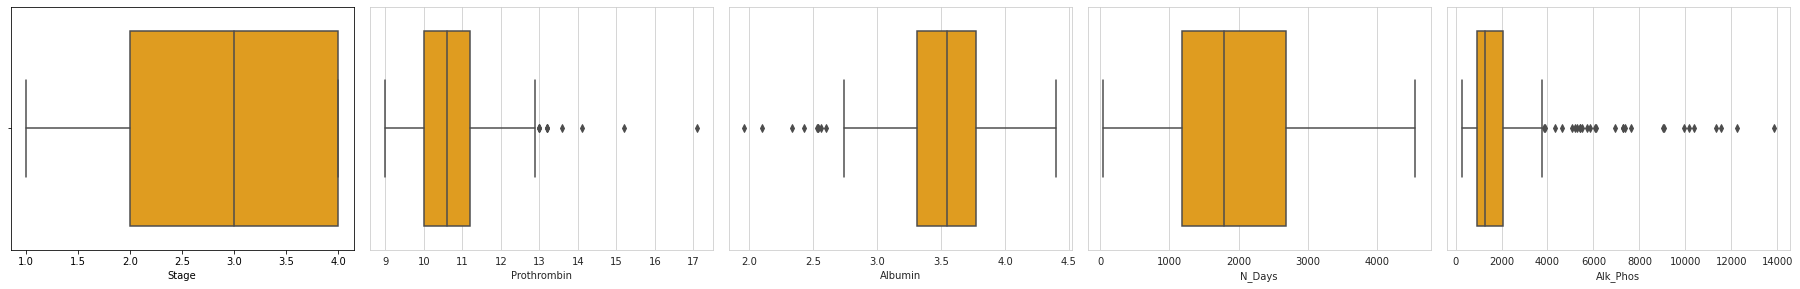

In [ ]:
#@title
print(" \n Summary  statistics of some of the key variables from my whiskers\n")
print(" A boxplot show the spread and centers of a data set, it shows a five number summary  the minimum , Q1: the first quartile , median,  Q3: the third quartile, maximum\n")
print("  In the Age  : 25% of values are younger than 42 years old  and 75% of values are younger than 58 years old \n")
print("  five number summary of Stage   the minimum : 1. , Q1: the first quartile : 2 , median : 3 ,  Q3: the third quartile : 4 , maximum :  4 \n")

print("  five number summary of Prothrombin  the minimum : 9 , Q1: the first quartile : 10 , median : 10.60 ,  Q3: the third quartile : 11.10	 , maximum :  18.00 \n")

print("  five number summary of Albumin  the minimum : 1.96	 , Q1: the first quartile : 3.2425, median : 3.53 ,  Q3: the third quartile : 3.77, maximum :  4.64 \n")

print("  five number summary of Alk_Phos the minimum : 289.. , Q1: the first quartile : 871.5 , median : 1259. ,  Q3: the third quartile : 1980 , maximum :  13862 \n")

print("  five number summary of  N_Days  the minimum : 41.00  , Q1: the first quartile :1092.75 , median : 1730.0 ,  Q3: the third quartile : 2613.50 , maximum :  4795. \n")


df_boxplot = df[['Stage','Prothrombin','Albumin','N_Days','Alk_Phos']]

l = df_boxplot.columns.values
number_of_columns=9
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(5*number_of_columns,4*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_boxplot[l[i]],color='orange',orient='v')
    plt.tight_layout()

We can see some outliers in Prothrombin from our patients in the higher end, a large amount of  Outliers Alk_phos on the higher end, and
some Albumin outlier in the lower end .
Since our sample is blood measurement  , our boxplots are thiner and the variation of  our samples are close.
Is it because of some error measurement or because the patients suffer from PBC ?

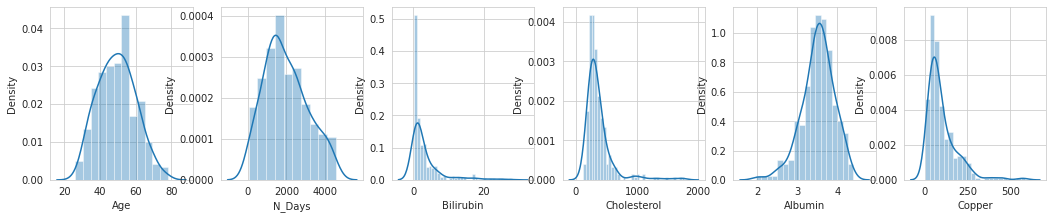

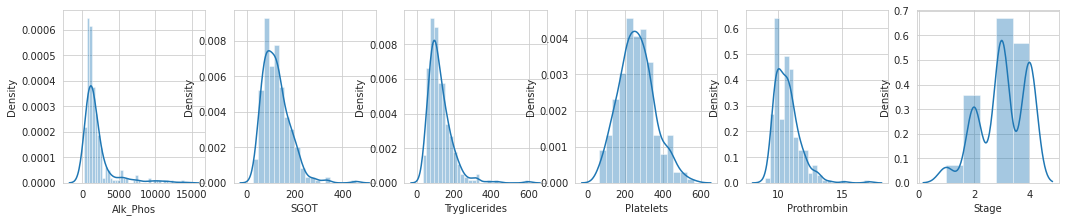

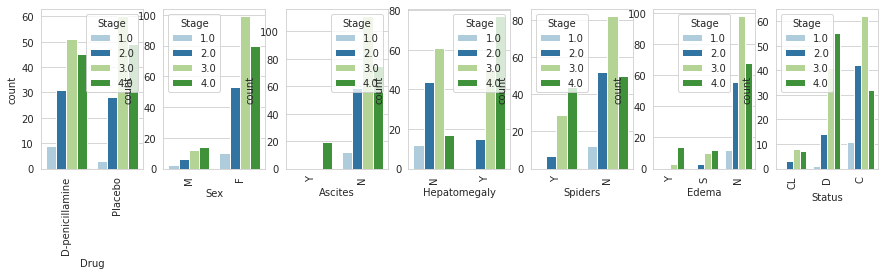

In [ ]:
#@title Distribution of Data
sns.set_style('whitegrid')
l = df.columns.values
number_of_columns=19
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(4*number_of_columns,4*number_of_rows))
for i in range(7,len(l)-6):
    plt.subplot(number_of_rows + 2,number_of_columns+6,i-2)
    sns.distplot(df[l[i]],kde=True) 

plt.figure(figsize=(4*number_of_columns,4*number_of_rows))
for i in range(13,len(l)):
    plt.subplot(number_of_rows + 2,number_of_columns+6,i-2)
    sns.distplot(df[l[i]],kde=True) 

plt.figure(figsize=(15,10))
for i, col in enumerate(df[['Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema','Status']]):
    sns.set_palette(sns.color_palette("Paired"))
    ax = plt.subplot(3,7,i+1)
    sns.countplot(
        x=col, data = df,  hue = 'Stage',ax = ax, 
        order = df[col].value_counts(ascending=True).index
    )
    
    plt.xticks(rotation=90)
    # plt.tight_layout()
plt.show()

We have a multimodal distibution in our Stage variable, most of our rows are of stage 3 , 4 then 2 downward.

Bilirubin,Cholesterol,Copper ,Alk_Phos ,SGOT ,Tryglicerides,Platelets, Prothrombin  are positively skewed
Albumin is  negatively  skewed (mean median are on right side).

Most of the patient were Female, did not have Ascites or Edema, about half of the patient had Hepatomagaly. 
The majority of the patients did not have spiders.

From the general distribution of my variables and correlation figure, we can see we have a multimodal distibution in our Stage variable, most of our rows are of stage 3 , 4 then 2 downward.
Bilirubin,Cholesterol,Copper ,Alk_Phos ,SGOT ,Tryglicerides,Platelets, Prothrombin  are positively skewed.

Albumin is  negatively  skewed,the mean and median are on right side.

Most of the patients were Female, did not have Ascites or Edema, about half of the patient had Hepatomagaly .
Those with a higher amount of Spiders and Edema are in Stage 3 and have a lower Hepatomegaly than the stage 4 patient .
The majority of the patients did not have spiders.
It is important to see that my dataset is imbalanced , the majority is female .

(1.96, 4.4)

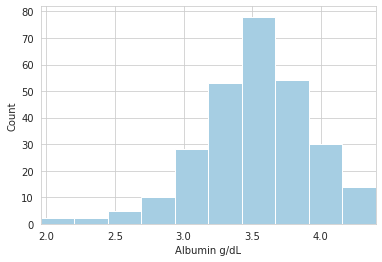

In [ ]:
df.Albumin.hist()
plt.xlabel("Albumin g/dL")
plt.ylabel("Count")  
plt.xlim(df.Albumin.min(),df.Albumin.max())

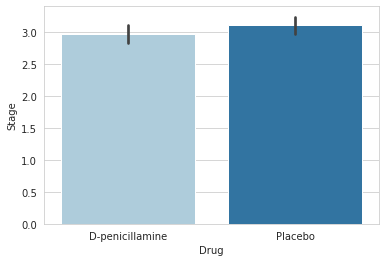

In [ ]:
#This shows the Randomized trial of Drug  
sns.barplot(data=df, y='Stage', x='Drug')

## <font color='lightblue'>2. a) Correlations </font>

There is no correlation among my attributes. Most of the scatterplot shows a non linear neutral correlations. 
For example:

* The two variables [Cholesterol and Copper] showed no relationship.

* The two variables [Cholesterol and Bilirubin] showed no relationship.

* Both correlations are weak with no directions.
 
* By consequence Cholesterol,Copper and Bilirubin do not influence each other.

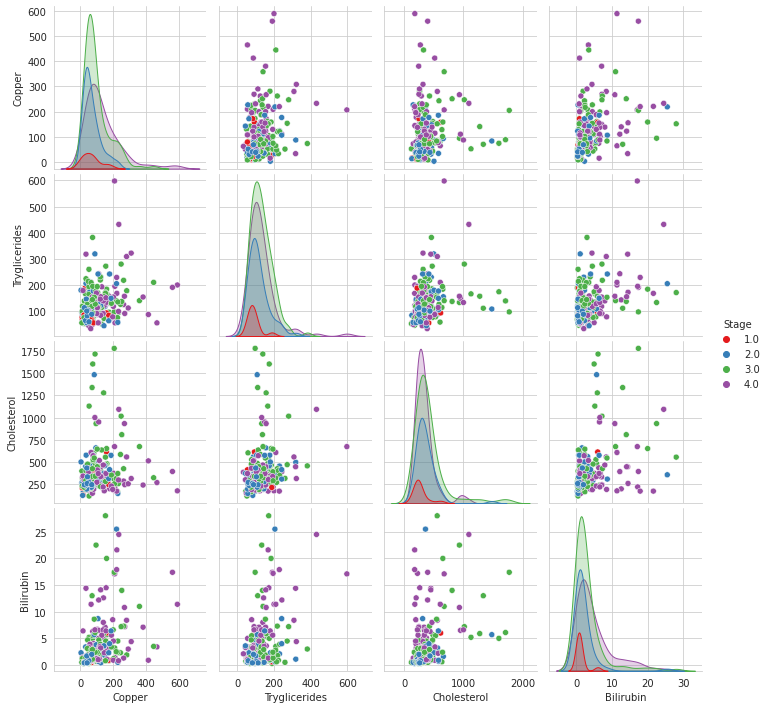

In [ ]:
#Some variables to look at 
df_pairs = df[["Stage","Copper","Tryglicerides","Cholesterol","Bilirubin"]] 
sns.pairplot(df_pairs, hue="Stage",palette="Set1")

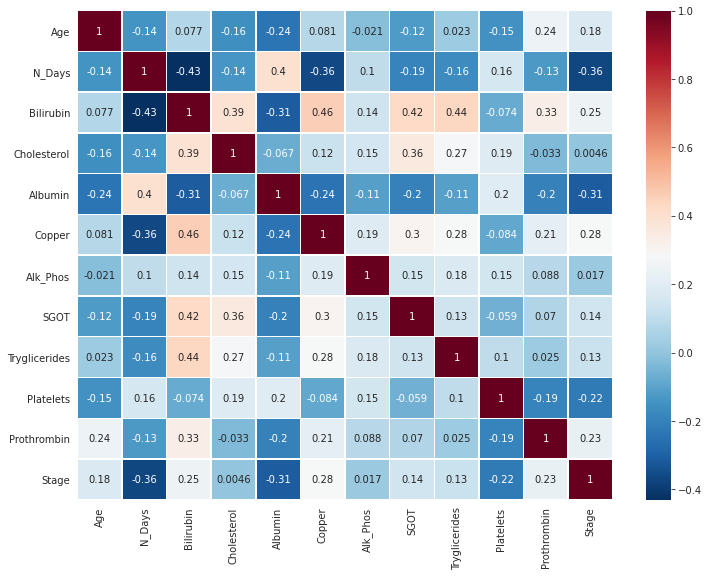

In [ ]:
#Heatmap of all variables
df_hm =df.copy()
pearsoncorr = df_hm.corr(method='pearson')
plt.subplots(figsize=(12,9))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

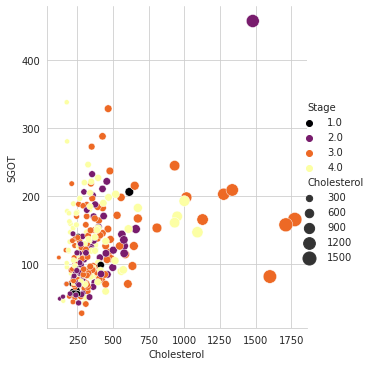

In [ ]:
#this plot shows that cholesterol values like the other numerical values are clusters , there is no specific stage clusters differenciation , the corr coef  = 0.35 is not close to one.
plot = sns.relplot(data=df, x='Cholesterol',y='SGOT',hue="Stage",size="Cholesterol",sizes=(20, 200),palette="inferno")
plot.fig.set_size_inches(5,5)

## <font color='lightblue'>3. Data wrangling and preprocessing </font>

## <font color='red'>**Action**: Layout all your data wrangling and preprocessing steps so that a reader will understand why you took each step, and would be able to reproduce your steps. (Marks: 3)

**Caution : Function that can be applied once only,  my goal is detect early stages in priority as stage 1 is good, stage 2 and 3 are still considered ok and stage 4 is really ill.**

In [ ]:
# Function that convert [2,3] -> 2 [1]-> 1 and [4] - > 3
def converge_results(x):
  if x > 1 and x <4:
     return 2
  elif x == 4:
    return 3
  else:
    return 1

In [ ]:
df.Stage = df.Stage.apply(converge_results)

**Action:** Do you need to apply any preprocessing steps? E.g., convert a binary variable to 1/0, or Apply at least one preprocessing step, and explain why you used it. 

Let's convert ['Sex','Ascites','Hepatomegaly','Spiders'] to 0/1 , our dataset has Yes and No, this representation of those variables is  more expressive.
As the target variable is already pre-processed there is no need to pre-processed it again .


In [ ]:
#get the columns names of features you'd like to turn into 0/1
bin_names = ['Sex','Ascites','Hepatomegaly','Spiders','Drug' ]

#create a dataframe of those features
bin_features = df[bin_names]

#fit the scaler to those data
bin_scaler = OrdinalEncoder().fit(bin_features.values)

#use the scaler to transform your data
bin_features = bin_scaler.transform(bin_features.values)

#put these scaled features back into your transformed features dataframe
df[bin_names] = bin_features

 use one-hot encoding to convert categorical variables?

> I Converted the categorical ''Edema'  and 'Status ' variables using onehot encoding to model my random forest.
> The reason I converted data is by one-hot encoding this categorical variable , it is much easier to work with then object which allows the representation of categorical data to be more expressive and represent the different categories without giving an order. It also helps to make the model. 


In [ ]:
df['Edema'] = df.Edema.astype('category')

#categorical variables
cat_names = ['Edema', 'Status']

#create dummy variables
df_cat = pd.get_dummies(df[cat_names])

#add them back to the original dataframe
df = pd.concat([df,df_cat], axis=1)

#remove the old columns
df = df.drop(cat_names, axis=1)

**Action:** Split your data into training and testing datasets :
I split the dataset into training and testing datasets

In [ ]:
#split data into predictors (X) and target (y)
X = df.drop(['Stage'], axis=1)
y = df['Stage']

#split these data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

**Action:** Scale any numeric variables. If you have no binary or categorical variables that need transforming.

In [ ]:
#Feature Scaling (after spliting the data!)
from sklearn.preprocessing import StandardScaler 

#numeric variables
numb_names = ['Cholesterol'	,	'Age',	'Albumin'	,'Copper',	'Alk_Phos'	,'SGOT', 'Tryglicerides', 'Platelets','Prothrombin'	]
#create the standard scaler object
sc = StandardScaler()

#use this object to fit (i.e., to calculate the mean and sd of each variable in the training data) and then to transform the training data
X_train[numb_names] = sc.fit_transform(X_train[numb_names])

#use the fit from the training data to transform the test data
X_test[numb_names] = sc.transform(X_test[numb_names])

#take a look
X_train

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Age,N_Days,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Edema_N,Edema_S,Edema_Y,Status_C,Status_CL,Status_D
80,0.0,0.0,0.0,1.0,1.0,1.298166,2540,14.4,0.375333,0.331570,-0.776814,-0.358503,-1.120778,2.785016,1.333564,0.897390,1,0,0,0,0,1
197,1.0,0.0,0.0,0.0,1.0,-1.371852,2357,0.7,-0.334466,-1.475799,-0.731731,-0.143685,0.359395,-0.536186,1.290672,-1.107418,1,0,0,1,0,0
160,1.0,0.0,0.0,0.0,0.0,-0.704347,2797,2.3,0.611933,0.114686,-1.114938,-0.473617,-0.010648,0.774815,0.089684,-1.107418,1,0,0,1,0,0
51,0.0,1.0,0.0,0.0,0.0,0.058515,2386,6.0,1.102658,0.452061,0.620765,1.393765,1.559511,-0.492486,1.086933,-0.152747,1,0,0,0,0,1
258,1.0,0.0,0.0,1.0,0.0,1.012093,1615,3.1,-0.373899,-1.307111,-0.686647,-0.407449,0.064646,-0.011786,-0.425025,-0.916484,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,1.0,0.0,0.0,0.0,0.0,-0.895063,3672,0.7,-0.693747,0.355668,-0.844439,-0.600061,-0.893059,-1.002320,-0.671656,0.038187,1,0,0,1,0,0
308,1.0,0.0,0.0,0.0,0.0,0.821377,994,0.4,-0.448384,-1.837273,-0.697918,-0.382070,-0.945397,-0.652720,-0.317794,0.038187,1,0,0,1,0,0
9,1.0,0.0,1.0,0.0,1.0,1.965670,51,12.6,-0.711273,-1.861371,0.417890,-0.494465,0.473255,0.235848,0.443547,0.706456,0,0,1,0,0,1
236,0.0,0.0,0.0,1.0,0.0,0.916735,1882,1.6,0.349044,-1.355308,0.023413,-0.538879,-0.665340,-0.273986,-0.853949,-0.630083,1,0,0,1,0,0


## <font color='lightblue'>4. Build a model</font>



## <font color='red'>**Action:** Use your training dataset to build a model with the goal addressing your question of interest. (Marks: 2)

<font color='red'>**Action:** Use your training dataset to build a model with the goal of predicting a target variable. *Marks: 2*

**My Random Forest Classifier should help to classify the differents Stages from Stage 1 , Stage2|3 and Stage 4.**
**It should  help answering the namely question :
Can my model correctly [classify/predict] an early stage PBC patient?**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#1. Build the model
forest_classifier = RandomForestClassifier(n_estimators=1000, bootstrap=True, max_features=0.8,max_samples=0.8)

#2. Fit the model to the data
forest_classifier.fit(X_train, y_train)

#3. predictions from the forest model
y_forest_pred = forest_classifier.predict(X_test)

## <font color='lightblue'>5. Measure performance</font>

Testing dataset is aplied to estimate the performance of my model. I used a confusion martrix to measure the performance of my Random forest.

Text(33.0, 0.5, 'True label')

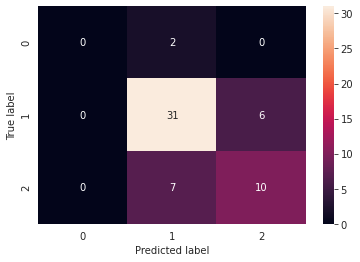

In [ ]:
from sklearn.metrics import confusion_matrix
cm_forest = confusion_matrix(y_test, y_forest_pred)
sns.heatmap(cm_forest, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')

> **Accuracy** is the overall ability of the model to correctly identify positive and negative samples.

> **Precision** is intuitively the ability of the classifier to not label a sample as positive if it is negative.

> **Recall** is intuitively the ability of the classifier to find all the positive samples.

In [ ]:
print('Accuracy: {:.2f}'.format(sk.metrics.accuracy_score(y_test, y_forest_pred)))
print('Precision : {:.2f}'.format(sk.metrics.precision_score(y_test, y_forest_pred, average='micro')))
print('Recall : {:.2f}'.format(sk.metrics.recall_score(y_test, y_forest_pred,average='micro')))

Accuracy: 0.73
Precision : 0.73
Recall : 0.73


In [ ]:
df.Stage.value_counts()

2    170
3     94
1     12
Name: Stage, dtype: int64

Compare that accuracy if we just predicted the most common type (i.e., let's compute a baseline!)

In [ ]:
#My Accuracy/Recognition Rate ,Precision , Recall/sensitivity/true_positive_rate are higher then my Baselines
Baseline_Stage1= 12 /(170+94+12)

Baseline_Stage2 = 170 / (170+94+12)
print(Baseline_Stage1)
print(Baseline_Stage2)

0.043478260869565216
0.6159420289855072


<font color='orange'> **Q4**: Measure the performance of your model, and describe how well your model generalizes to new data (Marks: 2)

<img src="C:\CM.PNG"/>

**The overall recognition rate of the classifier reflects how well the classifier recognizes tuples of my various clases stages.
we see that it mislabeled (5->9) "Stage4" tuples as "Stage2|3" and (2-3) tuples "Stage1" as "Stage2|3" .
It also mislabeled sometimes depending on the Test Samples 4 Stage2|3 tuples as "Stage4" .

Sensitivity of Stage 1 tells us that 0% of the patient  in Stage 1  were correctly classified.

Specificity of Stage1 tells us that 96% of the patient  in Stage 2|3 and Stage 4   were predicted to be of Stage 1.


Sensitivity of Stage 2|3 tells us that 74.4% of the patient  in Stage 2|3  were correctly classified.

Specificity of Stage 2|3  tells us that 69% of the patient  in Stage 1 and Stage 4   were predicted to be of Stage 2|3.

Sensitivity of Stage 4 tells us that 69% of the patient  in Stage 4  were correctly classified.

Specificity of Stage 4 tells us that 79% of the patient  in Stage 2|3 and Stage 1   were predicted to be of Stage 4 .


On Average 73% The overall recognition rate we correctly classified.

On Average Sensitivity = 73%  we correctly classified the correct Stage x -> Stage x.

Recall tells us that 73% completeness , is the pourcentage of positive that are actually such.

In conclusion , its ability to correctly label Stage 1 (rare) is mediocre stage 1 sensitivity even if the avg accuraccy is correct 73% .
**

## <font color='lightblue'>5. Interpret your model</font>

<font color='orange'> **Q5**: Interpret your model results. E.g., what features contributed to your predictions, if possible, can you determine the sign and magnitude of the effect (Marks: 2).



Q5 1.) An alternative way to use precision and recall is to combine them into a single measure.F measure or F-Score .

SelectKBest scores the features against the target variable using a function (in this case f_regression but could be others) & then retains the most significant features.

Using this method Hepametogaly,Prothrombine, Ascites, Albumin and N_days are the most 5 important features .

Spiders ,  Status  are over 10 importance.

In [ ]:
from sklearn.feature_selection import SelectKBest #Feature Selector
from sklearn.feature_selection import f_classif #F-ratio statistic for categorical values

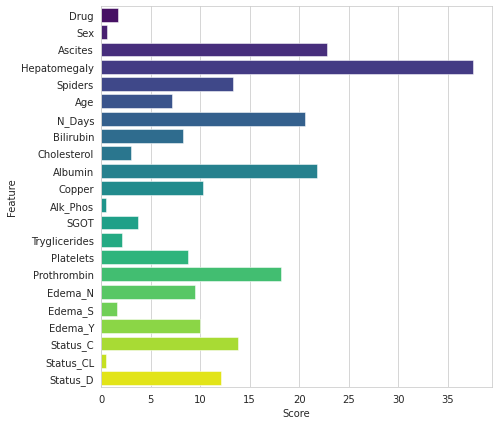

In [ ]:
#Feature Selection
X=df.drop(['Stage'], axis=1)
Y=df['Stage']
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns

#Visualize the feature scores
fig, ax=plt.subplots(figsize=(7,7))
plot=sns.barplot(data=featureScores, x='Score', y='Feature', palette='viridis',linewidth=0.5, saturation=2, orient='h')
plot

Q5 2) With permutation method and 30 shuffles randomly , the 2 important values that came to the top with a small standard deviation are 
Prothrombin	,Hepatomegaly

* Hepatomegaly have a mean importance	0.0589	
* Prothrombin have a mean importance of 0.0536 
	 
There sd < 0.5 which means it is certain of the importance values .

The values of the importance changes depending on different compilation.

In [ ]:
from sklearn.inspection import permutation_importance

#use permutation importance
perm_result = permutation_importance(forest_classifier, X=X_test, y=y_test, scoring='accuracy', n_repeats=30)

#place values into a dataframe
forest_importances = pd.DataFrame({'variable':X_test.columns,'impo':perm_result.importances_mean.round(4), "sd":perm_result.importances_std.round(4)})

#sort the dataframe
forest_importances.sort_values(by='impo', ascending=False)

,variable,impo,sd
3,Hepatomegaly,0.0589,0.0323
15,Prothrombin,0.0536,0.0323
11,Alk_Phos,0.0256,0.0205
5,Age,0.0244,0.0187
13,Tryglicerides,0.0220,0.0183
8,Cholesterol,0.0077,0.0158
9,Albumin,0.0077,0.0194
21,Status_D,0.0077,0.0088
10,Copper,0.0048,0.0256
12,SGOT,0.0030,0.0217


In [ ]:
#1. Create a dataframe
# df_question = df_question.drop(['Hepatomegaly','Spiders'], axis = 1)
forest_classifier
df_question = pd.DataFrame({ 'Edema_S':X_train.Edema_S.min(),
                             'Edema_Y':X_train.Edema_Y.min(),                   
                            'Edema_N':X_train.Edema_N.min(),
                            'Drug':X_train.Drug.median(),
                           'Status_C':X_train.Status_C.max(),
                             'Status_CL':X_train.Status_CL.max(),                   
                            'Status_D':X_train.Status_D.max(),
                            'N_Days':X_train.N_Days.mean(),
                            'Prothrombin':X_train.Prothrombin.mean(),
                            'Copper':X_train.Copper.median(),
                            'Platelets':X_train.Platelets.median(),
                            'Cholesterol':X_train.Cholesterol.median(),
                            'Albumin':list(range(-2,4,1)),
                            'Bilirubin':X_train.Bilirubin.median(),
                            'Age':X_train.Age.median(),
                            'Tryglicerides':X_train.Tryglicerides.median(),
                            'Alk_Phos':X_train.Alk_Phos.median(),
                            'SGOT':X_train.SGOT.median(),
                            'Spiders':X_train.Spiders.median(),
                            'Hepatomegaly':list(range(-2,4,1)),
                            'Ascites':X_train.Ascites.median(),
                            'Alk_Phos':X_train.Alk_Phos.median(),
                            'Sex': X_train.Sex.median()
                            }
                           )
# list(range(X_train.Prothrombin.min() , X_train.Prothrombin.max(), 1) 
#2. Use the model to make predictions
question_pred =  forest_classifier.predict(df_question)

#3. Take a look at the answer
question_pred

array([3, 3, 3, 2, 2, 2])

Q5 3)

The values of the predicted stages changes depending on different compilation randomly of the testing dataset sample.

**previous scores were ([3, 3, 3, 2, 2, 2])**

* For the average patient , If I vary Albumin with Hepatomegaly as Yes , it changes the prediction , we can see that our 2 features  show us that the importance of those two variable is confirmed.

**previous scores were array([3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2])
* As the timing of Prothrombine incresase from 2 to 9  and Status increase simultaneaously , the model predicts that the stage changes from 2|3 to Stage 4 patients at one point .

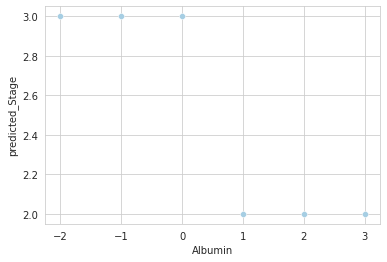

In [ ]:
#We can see that from 0 to 1 in Hepatomegaly , it changes from Stage 4 -> 3 to Stage 2|3 -> 2
#add a column to the df_question
df_question['predicted_Stage'] = question_pred

#plot the predictions
sns.scatterplot(data=df_question, x='Albumin',y='predicted_Stage', palette="RdBu_r")

In [ ]:
#1. Create a dataframe
forest_classifier
df_question = pd.DataFrame({ 
                            'Edema_S':X_train.Edema_S.min(),
                             'Edema_Y':X_train.Edema_Y.min(),                   
                            'Edema_N':X_train.Edema_N.min(),
                            'Drug':X_train.Drug.median(),
                            'Status_C':X_train.Status_C.max(),
                             'Status_CL':X_train.Status_CL.max(),                   
                            'Status_D':X_train.Status_D.max(),
                            'N_Days':X_train.N_Days.median(),
                            'Prothrombin':list(range(-2,10,1)),
                            'Copper':X_train.Copper.median(),
                            'Platelets':X_train.Platelets.median(),
                            'Cholesterol':X_train.Cholesterol.median(),
                            'Albumin':X_train.Albumin.median(),
                            'Bilirubin':X_train.Bilirubin.median(),
                            'Age':X_train.Age.median(),
                            'Tryglicerides':X_train.Tryglicerides.median(),
                            'Alk_Phos':X_train.Alk_Phos.median(),
                            'SGOT':X_train.SGOT.median(),
                            'Spiders':X_train.Spiders.median(),
                            'Hepatomegaly':X_train.Hepatomegaly.median(),
                            'Ascites':X_train.Ascites.median(),
                            'Alk_Phos':X_train.Alk_Phos.median(),
                            'Sex': X_train.Sex.median()
                            
                            })

#2. Use the model to make predictions
question_pred =  forest_classifier.predict(df_question)

#3. Take a look at the answer
question_pred


array([2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2])

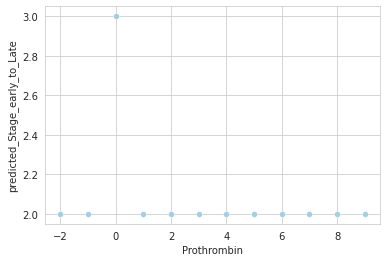

In [ ]:
#add a column to the df_question
df_question['predicted_Stage_early_to_Late'] = question_pred

#plot the predictions
sns.scatterplot(data=df_question, x='Prothrombin',y='predicted_Stage_early_to_Late')

## <font color='lightblue'>4. B) Build a model</font>

## <font color='red'>**Action:** Use your training dataset to build a model with the goal addressing your question of interest. (Marks: 2)

In [ ]:
#To be able to apply logistic regression we need binary results , for that reason I merged stage 1,2,3 as 1 and Stage 4 as 0 

def converge_results(x):
  if x > 3 :
     return 0
  else:
    return 1

In [ ]:
#get all the column names, with a + between them, as a string
all_columns = "+".join(X_train.drop(['Status_C','Status_CL','Status_D','Drug','Sex','Ascites','Hepatomegaly', 'Spiders', 'Edema_N','Edema_S','Edema_Y'],axis=1).columns ) 

numerical = X_train.drop(['Status_C','Status_CL','Status_D','Drug','Sex','Ascites','Hepatomegaly', 'Spiders', 'Edema_N','Edema_S','Edema_Y'],axis=1).select_dtypes('number').columns.tolist()
#write the formula
my_formula = "Stage~" + all_columns



df_train = pd.concat([X_train[numerical],y_train], axis=1)

df_test  = pd.concat([X_test[numerical],y_test], axis=1)


df_train.Stage = df_train.Stage.apply(converge_results)
df_test.Stage  = df_test.Stage.apply(converge_results)

In [ ]:

#define model parameters
log_reg2 = smf.logit(my_formula , data=df_train)

#fit the model to the training data
results2 = log_reg2.fit(method='bfgs')

#Get a summary of the model parameters
print(results2.summary())


         Current function value: 0.491516
         Iterations: 35
         Function evaluations: 47
         Gradient evaluations: 40
                           Logit Regression Results                           
Dep. Variable:                  Stage   No. Observations:                  220
Model:                          Logit   Df Residuals:                      208
Method:                           MLE   Df Model:                           11
Date:                Wed, 18 Aug 2021   Pseudo R-squ.:                  0.2408
Time:                        20:44:40   Log-Likelihood:                -108.13
converged:                      False   LL-Null:                       -142.44
Covariance Type:            nonrobust   LLR p-value:                 2.244e-10
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0655      0.475     -0.138      0.890      -0.997 

<font color='orange'> **Q5**: Interpret your model results. E.g., what features contributed to your predictions, if possible, can you determine the sign and magnitude of the effect (Marks: 2).

**Q5) Answer Model B)**

* The highest slopes are Albumin =0.5541, Prothrombin =-0.4440 ,Cholesterol = 0.3319 .

* Albumin =0.5541 -> positive slope , the magnitude/confidence interval is very large/broad 0.152  -> 0.957 and  it's confident the sign is positive, positive effect . 

* Prothrombin =-0.4440  -> negative slope , the magnitude/confidence interval is broad too (-0.797 to -0.091) and it's confident the sign  is negative, negative effect .

* Prothrombin and Albumine do the most work to explain in terms of predicting the correct Stage.
Cholesterol = 0.3319, the slope direction is positive but it's not confident of the sign.
* The rest of the variables are similar to Cholesterol  in the sense that they are not confident of the sign and  confidence interval is  large .
Bilirubin has a small confidence interval but it's not confident of the sign.

* Prothrombin Albumin Hepatomegaly are consistant features that come out from my 2 different Models .
They play a bigger role in influencing/predicting the correct binary Stages : Early :Stage 1 | 2 | 3 , Late:  Stage : 4 


Visualize and explore these predictions

In [ ]:
#let's first predict values in the testing dataset
df_test['Stage_prob_multi'] = results2.predict(df_test).round(2)

df_test['Stage_pred_multi'] = (df_test['Stage_prob_multi']>0.5).astype(int) #here we've used 0.5 as the threshold !

# df_test

## <font color='lightblue'>5. B) Measure performance</font>

**Action:** Use your testing dataset to estimate the performance of your model. Add text describing what kind of measure you used. *Marks: 2*

Text(33.0, 0.5, 'True label')

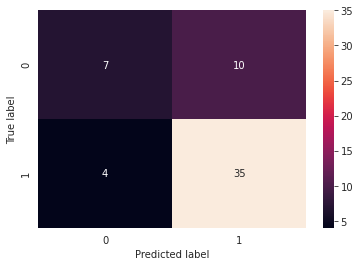

In [ ]:
#confusion table
confusion_matrix2 = sk.metrics.confusion_matrix(df_test['Stage'], df_test['Stage_pred_multi'])

# visual approach
sns.heatmap(confusion_matrix2, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [ ]:
print('Accuracy: {:.2f}'.format(sk.metrics.accuracy_score(df_test['Stage'], df_test['Stage_pred_multi'])))
print('Precision: {:.2f}'.format(sk.metrics.precision_score(df_test['Stage'], df_test['Stage_pred_multi'])))
print('Recall: {:.2f}'.format(sk.metrics.recall_score(df_test['Stage'], df_test['Stage_pred_multi'])))
BaseLine = (12+59+111) / (12+59+111 +94) 
print("BaseLine : ",round(BaseLine,2))

Accuracy: 0.75
Precision: 0.78
Recall: 0.90
BaseLine :  0.66


<font color='orange'> **Q4**: Measure the performance of your model, and describe how well your model generalizes to new data (Marks: 2)

My Base Rate (12+59+111) / (12+59+111 +94) = 66% , with this logistic regression with the  testing data sample accuracy is > 75%  this model did better then my Base Rate. .
The recall is higher , it only misclassified 2 that were Stage1|2|3 to a Stage 4 .
The precision is lower, when my model predicted that it was Stage 1|2|3 , it has a high percentage of clasifications (8-12 tuples False_positive depending on the split of the Test Dataset )

## <font color='lightblue'>5. B) Interpret your model</font>

## <font color='lightblue'>6. Answer your question</font>

<font color='orange'> **Q6:** Use your analysis above to answer your question of interest. Did you achieve your desired outcome, and what might the next steps be? Remember to write as though you are writing to team mates working on the same/similar problem. (Marks: 3)

My Random forest model predicted poorly patients of Stage 1 , it did a better work of predicted patients in Stage 2|3 and 4 .
For completion , I would need more measures of patiens of Stage 1 to have a better accuracy from my model.
An extra dataset where randomized patients with healthy measure can also help my model to be more effective.
The next step from my co-worker would be to apply differents methods such as oversampling and different measure of accuraccy such as roc_auc  and collect more data . An extensive GridsearchCV with more feature for my random forest can be applied for a better result.
Different classification algorithm can be applied for a better results. 

The relationship between Prothrombine and Status in my Random forest to the new df_question sample created seem to be linear  as the Stage increase from an Early Stage to a Stage 4 when Status Censored and Status censore dure to liver
are maxed .
C (censored), CL (censored due to liver tx).
Prothrombine in itself have an importance .

The relationship between Albumin and Hepatomegaly in in my Random forest to the new df_question sample created seem also to be linear but the Stage decrease from an Early Stage to a Stage 4.


Even after adding Stage 1 to Stage 2|3 in my Logistic Regression Model, the accurraccy did not go higher then my Random Forest. But Fortunately, my models provided a consistant  features importance namely: Prothrombin, Albumin Hepatomegaly.

My model failed to classify patients of Stage 0 and my data is lacking tuples of Stage 0 , another different approach would be to seperate each Stage separately as (Stage1 & Stage 4) , (Stage1 & Stage 3 )  and find the best way to cluster with an unsupervised machine learning such as HDBSCAN .

I would also encourage my team mates to look further in those variables relationships between Albumin and Hepatomegaly and other existing relationships.
<br>
Note: It is ok if your analysis doesn't provide a strong answer, you can point out where it failed. If anything you can cross the approach you took off the list of possible ways to tackle your question. I.e., you still made progress!